In [1]:
import sklearn
import pandas as pd 
import numpy as np
import time
import random

In [2]:
#get data
test_set = pd.read_csv("testing_set.csv")
feature_matrix = pd.read_csv("feature_matrix.csv")

In [3]:
#get user_id from testing set
temp = test_set.columns.values[1:]
test_user_id = []
for i in range(len(temp)):
    test_user_id.append(temp[i])
for i in range(len(test_user_id)):
    test_user_id[i] = int(test_user_id[i])
print("ID of users in the testing set is:")
print(test_user_id)

ID of users in the testing set is:
[37015, 37020, 37032, 37034, 37040, 37049, 37052, 37074, 37097, 37100, 37107, 37110, 37117, 37133, 37149, 37163, 37196, 37199, 37219, 37229, 37233, 37236, 37237, 37264, 37267, 37270, 37326, 37327, 37345, 37372, 37383, 37386, 37399, 37405, 37411, 37423, 37425, 37454, 37459, 37464, 37490, 37494, 37502, 37508, 37520, 37524, 37549, 37558, 37576, 37599, 37609, 37621, 37641, 37662, 37674, 37698, 37702, 37720, 37725, 37754, 37781, 37800, 37803, 37806, 37808, 37823, 37873, 37874, 37903, 37916, 37922, 37928, 37965, 37971, 37979, 37985, 37998, 38004, 38009, 38042, 38045, 38079, 38083, 38087, 38100, 38120, 38137, 38152, 38162, 38213, 38233, 38237, 38253, 38263, 38275, 38278, 38290, 38312, 38318, 38322, 38324, 38367, 38381, 38383, 38388, 38433, 38436, 38462, 38467, 38471, 38487, 38494, 38515, 38521, 38525, 38531, 38537, 38541, 38544, 38555, 38557, 38582, 38586, 38599, 38622, 38644, 38732, 38747, 38753, 38757, 38769, 38777, 38790, 38797, 38803, 38813, 38820, 38833

In [4]:
def get_SubX_and_SubY(n:int):
    #user n
    column_n = str(n) 
    sub_y = test_set[test_set[column_n]!=0][['anime_id',column_n]]
    merge_table = pd.merge(feature_matrix,sub_y,on =  'anime_id') 
    subY = merge_table[column_n].values
    subX = merge_table['genre_vector'].values
    subX = np.array([eval(vector) for vector in subX])
    del sub_y,merge_table
    total,N = 0,0
    for rating in subY:
        if rating != -1:
            total += rating
            N+=1
    if N!=0:
        for i in range(len(subY)):
            if subY[i] == -1:
                subY[i] = round(total/N,2)
    else:
        for i in range(len(subY)):
            subY[i] = 5
    row,col = subX.shape
    mean = np.mean(subY)
    #for the rating bigger than mean rating, we change it to 1 since the user seem to like it, and -1 other wise
    for i in range(len(subY)):
        if subY[i] != 0:
            if subY[i] >= mean:
                subY[i] = 1
            else:
                subY[i] = -1
    #since subX and subY has the same number of row
    #70% and 30% remaining of subX
    subX1,subX2 = subX[:(row*7)//10],subX[-(row*3)//10::]
    #70% and 30% remaining of subY
    subY1,subY2 = subY[:(row*7)//10],subY[-(row*3)//10::]
    del subX,total,N,subY,mean
    return subX1,subX2,subY1,subY2

_,__,___,____ = get_SubX_and_SubY(37015)
print(_,__,___,____)

[[1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
  0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 0 0]] [[1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]] [1. 1. 1.] [1. 1.]


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
def DecisionTree():
    model = DecisionTreeClassifier()
    return model

In [6]:
#evaluate function
def hitRate(v1,v2) -> float:
    """
    This function is used to calculate the accuracy of the prediction

    Parameter v1,v2: 1D arrays (in this file)

    Return : float  
    """
    len = v1.size
    num = 0
    for i in range(len):
        if v1[i] == v2[i]:
            num +=1
    return round(num/len * 100,2)
def containOnlyOneClass(v1):
    """
    This function is used to check whether the output contain only 1 class or not

    Parameter v1: an 1D array (in this file)

    Return : boolean value True or False 
    """
    temp = v1[0]
    for i in v1:
        if i != temp:
            return False
    return True

In [7]:
total_precision = 0
num = 0
start_time = time.time()
for test_user in test_user_id:
    x_train,x_test,y_train,y_test = get_SubX_and_SubY(test_user)
    if containOnlyOneClass(y_train):
        print("The training label has only one class")
    else:
        model = DecisionTree()
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        #print(y_predict)
        #print(y_test)
        print("Accuracy for the rating of user with ID {} : ".format(test_user),hitRate(y_predict,y_test))
        total_precision += hitRate(y_predict,y_test)
        print()
        num += 1
end_time = time.time()
print("Accuracy when testing with {} users is: ".format(num), total_precision/num)
print("Execution time: ",end_time-start_time)

The training label has only one class
Accuracy for the rating of user with ID 37020 :  48.84

Accuracy for the rating of user with ID 37032 :  56.25

Accuracy for the rating of user with ID 37034 :  57.14

Accuracy for the rating of user with ID 37040 :  93.33

Accuracy for the rating of user with ID 37049 :  55.56

Accuracy for the rating of user with ID 37052 :  82.35

Accuracy for the rating of user with ID 37074 :  60.47

Accuracy for the rating of user with ID 37097 :  54.29

The training label has only one class
Accuracy for the rating of user with ID 37107 :  50.0

Accuracy for the rating of user with ID 37110 :  100.0

Accuracy for the rating of user with ID 37117 :  25.0

Accuracy for the rating of user with ID 37133 :  60.0

Accuracy for the rating of user with ID 37149 :  54.17

Accuracy for the rating of user with ID 37163 :  60.0

Accuracy for the rating of user with ID 37196 :  90.0

Accuracy for the rating of user with ID 37199 :  55.56

Accuracy for the rating of user w

User with ID:  46098
Predict :  [-1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.]
True rating :  [-1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.]
Accuracy:  40.0


[Text(0.6071428571428571, 0.9, 'x[1] <= 0.5\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.35714285714285715, 0.7, 'x[0] <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.21428571428571427, 0.5, 'x[38] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.14285714285714285, 0.3, 'x[8] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5, 'x[4] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.7, 'x[35] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.7857142857142857, 0.5, 'x[6] <= 0.5\ngini = 0.124\nsamples = 15\nvalue = [14, 

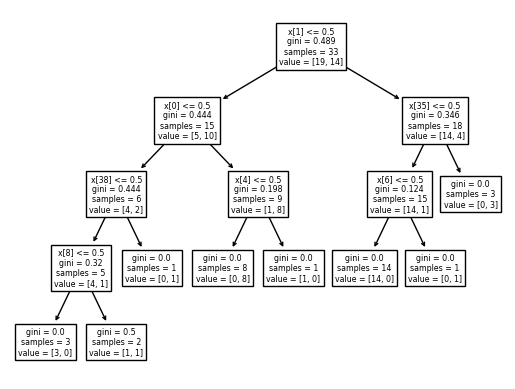

In [12]:
#get a random user and plot the decision tree
random_user = random.choice(test_user_id)
x_train,x_test,y_train,y_test = get_SubX_and_SubY(random_user)
model = DecisionTree()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print("User with ID: ",random_user)
print("Predict : ",y_predict)
print("True rating : ", y_test)
print("Accuracy: ",hitRate(y_predict,y_test))

tree.plot_tree(model)